## Shark attacks

In [334]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
from shapely.geometry import Point 
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [336]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [222]:
sharks = pd.read_excel("GSAF5.xls",  na_values=["UNKNOWN"])

In [223]:
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2017.07.09,09-Jul-2017,2017.0,Unprovoked,USA,Florida,"Haulover Beach, Miami-Dade County",Swimming,Elvin Lanza,M,46,Lower legs bitten,N,15h30,"Bull shark, 4' to 5'","Miami-Beach Patch, 7/9/2017",2017.07.09-Lanza.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.09,2017.07.09,6105.0,NaN,NaN
1,2017.07.07,07-Jul-2017,2017.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,Teen,"No injury, shark bit surfboard",N,15h00,"White shark, 2.5 m","Dispatch Live, 7/7/2027",2017.07.07-Stein.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.07,2017.07.07,6104.0,NaN,NaN
2,2017.07.02,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,NaN,NaN,"Skull found in shark, a probable drowning & sc...",F,NaN,NaN,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6103.0,NaN,NaN
3,2017.06.29,29-Jun-2017,2017.0,Invalid,USA,South Carolina,Wrightsville Beach,Fishing,male,M,NaN,"Arm injured by hook, not by a shark",N,19h30,NaN,"C. Creswell, GSAF",2017.06.29-Wrightsville.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.29,2017.06.29,6102.0,NaN,NaN
4,2017.06.29.R,Reported 29-Jun-2017,2017.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Olivia Wallhauser,F,Teen,Left foot bitten,N,NaN,NaN,"TriStateHomePage, 6/29/2017",2017.06.29.R-Wallhauser.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.29.R,2017.06.29.R,6101.0,NaN,NaN
5,2017.06.19,19-Jun-2017,2017.0,Unprovoked,USA,Florida,"Singer Island, Palm Beach County",Surfing,male,M,NaN,1 to 2-inch laceration behind knee,N,Morning,NaN,"CBS12, 6/19/2017",2017.06.19-SingerIsland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.19,2017.06.19,6100.0,NaN,NaN
6,2017.06.18.b,18-Jun-2017,2018.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Regan Readnour,F,14,Leg bitten,N,NaN,"Bull shark, 4' to 5'","NBC, 6/29/2017",2017.06.18.b-Readnour.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.18.b,2017.06.18.b,6099.0,NaN,NaN
7,2017.06.18.a,18-Jun-2017,2018.0,Unprovoked,REUNION,NaN,Roches Noire,Body boarding,Julien,M,34,"No injury, shark bit surfboard",N,10h00,"Bull shark, 2m","Clincanoo, 6/19/2017",2017.06.18.a-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.18.a,2017.06.18.a,6098.0,NaN,NaN
8,2017.06.17,17-Jun-2017,2017.0,Unprovoked,SPAIN,Ibiza Island,Playa d’en Bossa,Swimming,male,M,82,2-inch laceration to hand,N,12h00,NaN,"Diario de Ibiza, 6/17/'2017",2017.06.17-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.17,2017.06.17,6097.0,NaN,NaN
9,2017.06.14.R,Reported 14-Jun-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Feeding sharks,Carly,F,NaN,Fingernail pulled off,N,NaN,NaN,"AOL.UK, 6/14/2017",2017.06.14.R-Carly.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.14.R,2017.06.14.R,6096.0,NaN,NaN


In [225]:
sharks.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [469]:
sharks['number_age'] = pd.to_numeric(sharks['Age'], errors='coerce')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [471]:
sharks.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,number_age
0,09-Jul-2017,2017.0,Unprovoked,USA,Florida,"Haulover Beach, Miami-Dade County",Swimming,Elvin Lanza,M,46,Lower legs bitten,N,15h30,"Bull shark, 4' to 5'",46.0
1,07-Jul-2017,2017.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,15,"No injury, shark bit surfboard",N,15h00,"White shark, 2.5 m",15.0
4,Reported 29-Jun-2017,2017.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Olivia Wallhauser,F,15,Left foot bitten,N,NaN,NaN,15.0
6,18-Jun-2017,2018.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Regan Readnour,F,14,Leg bitten,N,NaN,"Bull shark, 4' to 5'",14.0
7,18-Jun-2017,2018.0,Unprovoked,REUNION,NaN,Roches Noire,Body boarding,Julien,M,34,"No injury, shark bit surfboard",N,10h00,"Bull shark, 2m",34.0


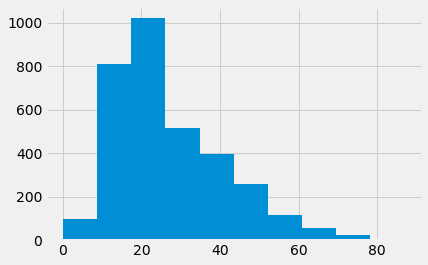

In [479]:
# if I have had Soma's amazing command (pd.to_numeric(sharks['Age'], errors='coerce'), I would have never practiced to much reg ex
sharks['number_age'].hist()

In [474]:
sharks['number_age']


0       46.0
1       15.0
4       15.0
6       14.0
7       34.0
8       82.0
10      48.0
12      19.0
13      30.0
15      32.0
16      20.0
18      73.0
19      41.0
20      29.0
21      33.0
22      18.0
24      14.0
25      33.0
26      28.0
27      20.0
29      40.0
32      17.0
33      28.0
34      17.0
37      35.0
38      10.0
39      21.0
40      16.0
41      51.0
42      39.0
43      17.0
44      58.0
45      30.0
47      58.0
50      26.0
51      26.0
52      22.0
56      37.0
57      15.0
58      55.0
59      57.0
61      48.0
63      47.0
64      20.0
65      16.0
67      55.0
68      61.0
69      19.0
70      36.0
71      20.0
72      65.0
73      73.0
74      58.0
75      41.0
76      42.0
77      36.0
78      36.0
80      66.0
82      25.0
83      29.0
84      21.0
85      32.0
86      17.0
87      16.0
88      36.0
89      43.0
90      43.0
94      60.0
95      51.0
96      50.0
97      12.0
99       9.0
100     22.0
102     25.0
103     37.0
104     20.0
105     49.0

In [226]:
sharks.drop(sharks.columns[[0, 15, 16, 17, 18, 19, 20, 21, 22, 23]], axis=1, inplace=True)

In [227]:
sharks['Year'].describe()

count    6102.000000
mean     1926.346444
std       284.157124
min         0.000000
25%      1942.000000
50%      1976.000000
75%      2004.000000
max      2018.000000
Name: Year, dtype: float64

In [228]:
sharks.rename(columns={"Sex ": "Sex"}, inplace=True)

In [229]:
sharks["Sex"].value_counts().head()

M      4911
F       610
M         2
lli       1
N         1
Name: Sex, dtype: int64

In [230]:
sharks["Sex"].value_counts(dropna=False)

NaN    20091
M       4911
F        610
M          2
lli        1
N          1
.          1
Name: Sex, dtype: int64

In [231]:
sharks.dropna(subset=["Sex"], inplace=True)

In [232]:
sharks["Sex"].unique()

array(['M', 'F', 'M ', 'lli', 'N', '.'], dtype=object)

In [233]:
sharks = sharks[sharks["Sex"].isin(["M","F"])]

In [234]:
sharks["Sex"].head()

0    M
1    F
3    M
4    F
5    M
Name: Sex, dtype: object

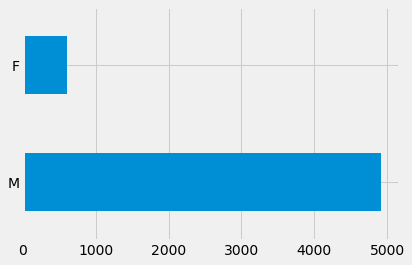

In [235]:
sharks["Sex"].value_counts().plot(kind='barh')

In [236]:
sharks["Country"].value_counts().head()

USA                 2060
AUSTRALIA           1158
SOUTH AFRICA         507
PAPUA NEW GUINEA     114
NEW ZEALAND          111
Name: Country, dtype: int64

In [237]:
sharks["Fatal (Y/N)"].value_counts()

N                 4019
Y                 1419
 N                   8
2017                 1
--M524--M3133Y       1
Name: Fatal (Y/N), dtype: int64

In [238]:
sharks.groupby(["Country", "Fatal (Y/N)"]).sum()

Year
Country                               Fatal (Y/N)           
 PHILIPPINES                          Y               1944.0
 TONGA                                N               2000.0
                                      Y               4008.0
ADMIRALTY ISLANDS                     N               1962.0
ALGERIA                               Y               1844.0
AMERICAN SAMOA                        Y               5867.0
ANDAMAN / NICOBAR ISLANDAS            Y               1958.0
ANGOLA                                N               1993.0
ANTIGUA                               N               2011.0
ARGENTINA                             N               1954.0
ARUBA                                 Y               2015.0
ASIA?                                 N                  0.0
ATLANTIC OCEAN                        N               9876.0
                                      Y              11466.0
AUSTRALIA                              N             11760.0
                                      N            1568622.0
                                      Y             625482.0
AZORES                                N               5891.0
BAHAMAS                               N             169472.0
                                      Y              23393.0
BAHREIN                               Y                  0.0
BARBADOS                              N               3598.0
                                      Y               5408.0
BAY OF BENGAL                         Y               1942.0
BELIZE                                N               2013.0
                                      Y               2006.0
BERMUDA                               N              15645.0
                                      Y               1959.0
BRAZIL                                N             107890.0
                                      Y              67806.0
BRITISH ISLES                         N               1971.0
BRITISH NEW GUINEA                    N               1890.0
BRITISH VIRGIN ISLANDS                Y               2007.0
BRITISH WEST INDIES                   N               1962.0
BURMA                                 N                  0.0
                                      Y               3788.0
Between PORTUGAL & INDIA              Y               1580.0
CANADA                                N              11696.0
                                      Y               3779.0
CAPE VERDE                            N               2016.0
                                      Y               3861.0
CARIBBEAN SEA                         N               3953.0
                                      Y               5714.0
CAYMAN ISLANDS                        N               4030.0
CENTRAL PACIFIC                       N               1943.0
                                      Y               1943.0
CEYLON (SRI LANKA)                    Y                  0.0
CHILE                                 N               7981.0
                                      Y               7865.0
CHINA                                 N               5928.0
...                                                      ...
SOUTHWEST PACIFIC OCEAN               Y               1942.0
SPAIN                                 N              51252.0
                                      Y              14945.0
SRI LANKA                             N              19317.0
                                      Y               5672.0
ST HELENA, British overseas territory N               2017.0
ST. MAARTIN                           N               2005.0
ST. MARTIN                            N               2014.0
SUDAN                                 N               1952.0
                                      Y               1966.0
SUDAN?                                N               1954.0
SYRIA                                 Y               1880.0
Seychelles                            Y               2005.0
Sierra Leone                  

In [239]:
sharks["Year"].head()

0    2017.0
1    2017.0
3    2017.0
4    2017.0
5    2017.0
Name: Year, dtype: float64

In [240]:
sharks['Year'].replace('.0', '').head()

0    2017.0
1    2017.0
3    2017.0
4    2017.0
5    2017.0
Name: Year, dtype: float64

In [241]:
sharks["Year"].head().astype(int)

0    2017
1    2017
3    2017
4    2017
5    2017
Name: Year, dtype: int64

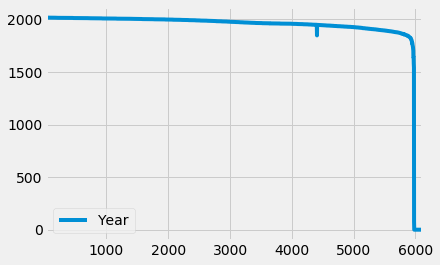

In [242]:
sharks[sharks["Fatal (Y/N)"] == "Y"].plot()

In [243]:
df_fatal= sharks[sharks["Fatal (Y/N)"] == "Y"]

In [244]:
df_fatal

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
21,05-May-2017,2017.0,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,33,FATAL,Y,17h00,NaN
26,29-Apr-2017,2017.0,Unprovoked,REUNION,Saint-Leu,Pointe au Sal,Body boarding,Adrien Dubosc,M,28,FATAL,Y,11h15,NaN
32,17-Apr-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,Kelpies near Wylie Bay,Surfing,Laeticia Brouwer,F,17,FATAL,Y,16h00,White shark
50,21-Feb-2017,2017.0,Unprovoked,REUNION,Saint-Andre,NaN,Body boarding,Alexandre Naussance,M,26,Fatal,Y,09h30,NaN
96,06-Sep-2016,2016.0,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,50,FATAL,Y,15h40,NaN
142,05-Jun-2016,2016.0,Unprovoked,AUSTRALIA,Western Australia,Mindarie,Diving,Doreen Collyer,F,60,FATAL,Y,11h30,3+ m shark
146,31-May-2016,2016.0,Unprovoked,AUSTRALIA,Western Australia,"Falcon Beach, Mandurah",Surfing,Ben Gerring,M,29,FATAL,Y,16h00,White shark
162,09-Apr-2016,2016.0,Unprovoked,NEW CALEDONIA,Grand Terre,Poe Beach,Walking,Nicole Malignon,F,69,FATAL,Y,10h45,"Tiger shark, 2.5 m"
173,10-Mar-2016,2016.0,Unprovoked,Fiji,Vanua Levu,NaN,Diving for beche-de-mer,Maika Tabua,M,45,FATAL,Y,Afternoon,NaN
198,19-Dec-2015,2015.0,Unprovoked,ARUBA,NaN,Boat capsized,Sea disaster,Adrian Esteban Rafael,M,58,FATAL,Y,NaN,NaN


In [245]:
df_nonfatal = sharks[sharks["Fatal (Y/N)"] == "N"]
df_nonfatal['Fatal (Y/N)'].value_counts()

N    4019
Name: Fatal (Y/N), dtype: int64

In [246]:
pd.set_option('display.max_columns', 100)

In [247]:
pd.set_option('display.max_rows', 100)

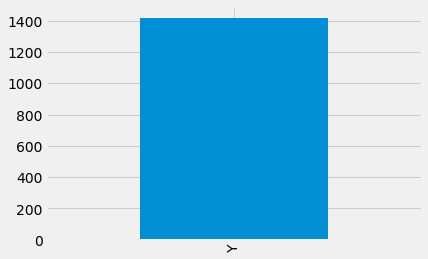

In [362]:
df_fatal['Fatal (Y/N)'].value_counts().plot(kind='bar')

In [249]:
attack = sharks.groupby(['Year','Fatal (Y/N)'])['Area'].count().to_frame().reset_index()

In [250]:
attack[attack['Fatal (Y/N)'] == 'Y'] 

,Year,Fatal (Y/N),Area
1,0.0,Y,42
3,77.0,Y,1
4,1543.0,Y,1
5,1580.0,Y,0
6,1642.0,Y,1
8,1700.0,Y,0
10,1721.0,Y,1
11,1738.0,Y,1
12,1742.0,Y,0
13,1748.0,Y,1


In [251]:
attack = attack[(attack["Year"]>1970) & (attack["Year"]<2017)]

In [252]:
sharks

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,09-Jul-2017,2017.0,Unprovoked,USA,Florida,"Haulover Beach, Miami-Dade County",Swimming,Elvin Lanza,M,46,Lower legs bitten,N,15h30,"Bull shark, 4' to 5'"
1,07-Jul-2017,2017.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,Teen,"No injury, shark bit surfboard",N,15h00,"White shark, 2.5 m"
3,29-Jun-2017,2017.0,Invalid,USA,South Carolina,Wrightsville Beach,Fishing,male,M,NaN,"Arm injured by hook, not by a shark",N,19h30,NaN
4,Reported 29-Jun-2017,2017.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Olivia Wallhauser,F,Teen,Left foot bitten,N,NaN,NaN
5,19-Jun-2017,2017.0,Unprovoked,USA,Florida,"Singer Island, Palm Beach County",Surfing,male,M,NaN,1 to 2-inch laceration behind knee,N,Morning,NaN
6,18-Jun-2017,2018.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Regan Readnour,F,14,Leg bitten,N,NaN,"Bull shark, 4' to 5'"
7,18-Jun-2017,2018.0,Unprovoked,REUNION,NaN,Roches Noire,Body boarding,Julien,M,34,"No injury, shark bit surfboard",N,10h00,"Bull shark, 2m"
8,17-Jun-2017,2017.0,Unprovoked,SPAIN,Ibiza Island,Playa d’en Bossa,Swimming,male,M,82,2-inch laceration to hand,N,12h00,NaN
9,Reported 14-Jun-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Feeding sharks,Carly,F,NaN,Fingernail pulled off,N,NaN,NaN
10,11-Jun-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m"


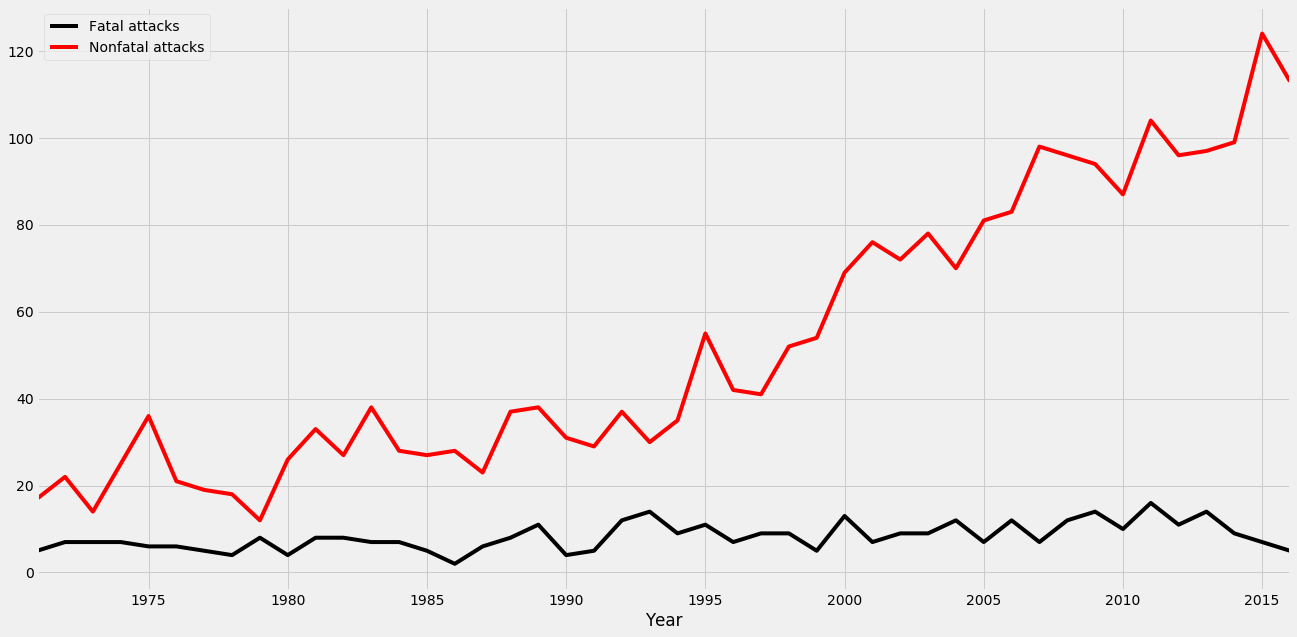

In [337]:
ax = attack[attack['Fatal (Y/N)'] == 'Y'].plot(kind='line', color='black', x='Year', y='Area', figsize=(20,10), label='Fatal attacks') 
attack[attack['Fatal (Y/N)'] == 'N'].plot(kind='line', color='red', x='Year', y='Area', figsize=(20,10), ax=ax, label='Nonfatal attacks')
plt.savefig("fatalattacks.pdf")

In [254]:
sharks['Activity'].value_counts()

Surfing                                                                                                               906
Swimming                                                                                                              811
Fishing                                                                                                               323
Spearfishing                                                                                                          308
Bathing                                                                                                               149
Wading                                                                                                                144
Diving                                                                                                                107
Standing                                                                                                               97
Snorkeling              

In [255]:
swimming = sharks[(sharks["Activity"] == "Swimming") & (sharks['Fatal (Y/N)'] == 'N')]
surfing = sharks[(sharks["Activity"] == "Surfing") & (sharks['Fatal (Y/N)'] == 'N')]
fishing = sharks[(sharks["Activity"] == "Fishing") & (sharks['Fatal (Y/N)'] == 'N')]
wading = sharks[(sharks["Activity"] == "Wading") & (sharks['Fatal (Y/N)'] == 'N')]

In [256]:
swim_counts_fatal = swimming["Year"].value_counts().to_frame().reset_index()
surf_counts_fatal = surfing["Year"].value_counts().to_frame().reset_index()
fish_counts_fatal = fishing["Year"].value_counts().to_frame().reset_index()
wade_counts_fatal = wading["Year"].value_counts().to_frame().reset_index()

In [257]:
swim_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
surf_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
fish_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
wade_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)

swim_counts_fatal.sort_values(by="Year_",inplace=True)
surf_counts_fatal.sort_values(by="Year_",inplace=True)
fish_counts_fatal.sort_values(by="Year_",inplace=True)
wade_counts_fatal.sort_values(by="Year_",inplace=True)

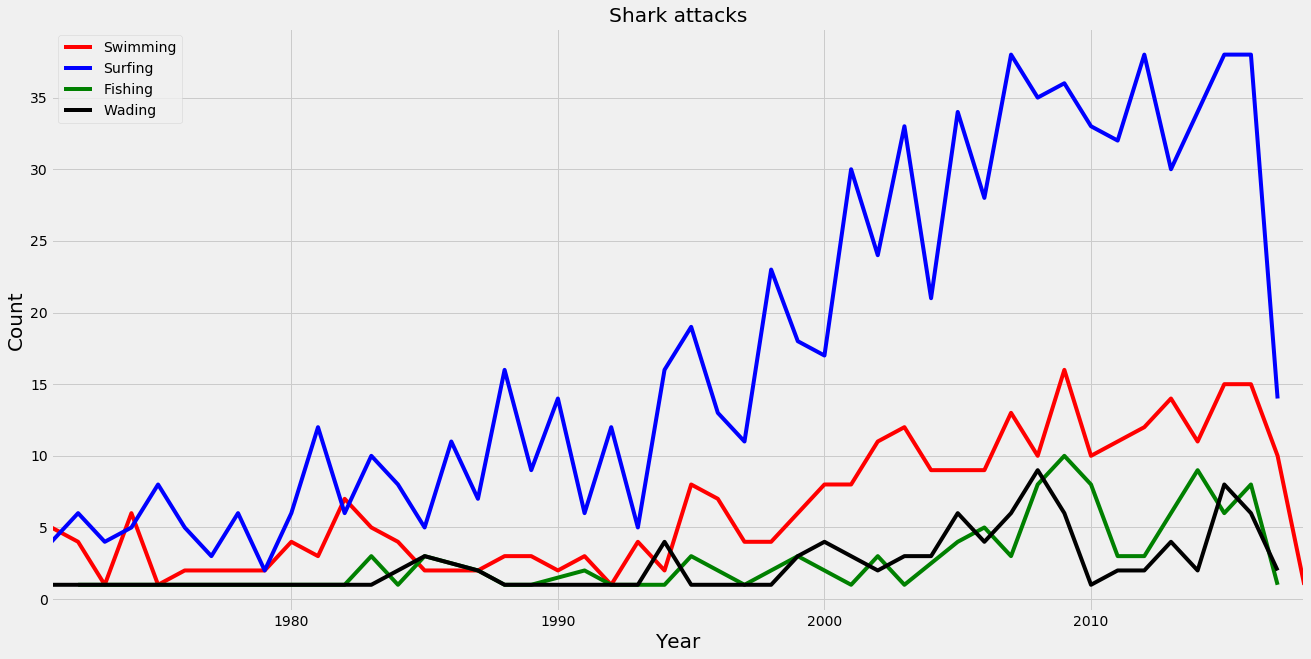

In [338]:
ax = swim_counts_fatal[swim_counts_fatal["Year_"]>1970].plot(title='Shark attacks', kind="line", y='Cases', x='Year_', color='red', label='Swimming', figsize=(20,10))
surf_counts_fatal[surf_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='blue', label='Surfing', ax=ax)
fish_counts_fatal[fish_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='green', label='Fishing', ax=ax)
wade_counts_fatal[wade_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='black', label='Wading', ax=ax)
ax.legend(loc=2)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.savefig("activities.pdf")

In [260]:
sharks.groupby("Activity")["Sex"].value_counts()

Activity                                                                                                                                                                                                                                                        Sex
                                                                                                                                                                                                                                                                M       1
 a canoe was pursuing a schooner that had forcibily abducted 5 young girls                                                                                                                                                                                      M       1
"Boat accident"                                                                                                                                                                                                 

In [261]:
swimming2 = sharks[(sharks["Activity"] == "Swimming") | (sharks['Fatal (Y/N)'] == 'N')]
surfing2 = sharks[(sharks["Activity"] == "Surfing") | (sharks['Fatal (Y/N)'] == 'N')]
fishing2 = sharks[(sharks["Activity"] == "Fishing") | (sharks['Fatal (Y/N)'] == 'N')]
wading2 = sharks[(sharks["Activity"] == "Wading") | (sharks['Fatal (Y/N)'] == 'N')]

In [262]:
swim2_counts_fatal = swimming["Sex"].value_counts().to_frame().reset_index()
surf2_counts_fatal = surfing["Sex"].value_counts().to_frame().reset_index()
fish2_counts_fatal = fishing["Sex"].value_counts().to_frame().reset_index()
wade2_counts_fatal = wading["Sex"].value_counts().to_frame().reset_index()

In [263]:
male_swimming = swimming[swimming["Sex"] == "M"]
female_swimming = swimming[swimming["Sex"] == "F"]
male_surfing = surfing[surfing["Sex"] == "M"]
female_surfing= surfing[surfing["Sex"] == "M"]
male_fishing = fishing[fishing["Sex"] == "M"]
female_fishing = fishing[fishing["Sex"] == "M"]

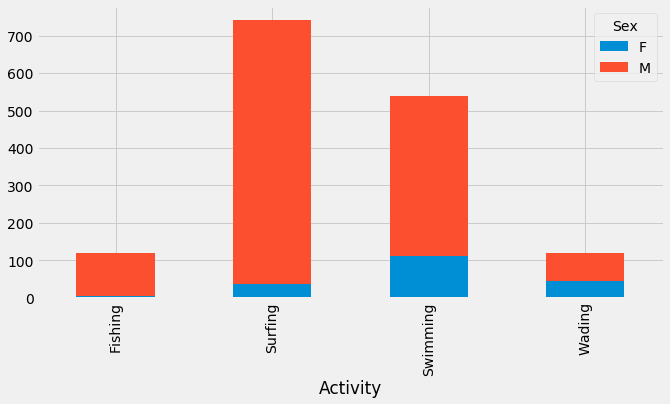

In [339]:
interested = sharks[sharks.Activity.isin(['Swimming', 'Surfing','Wading', 'Fishing'])]
interested.groupby('Activity')['Sex'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.savefig("gender.pdf")

In [265]:
sharks['Age']                                 

0             46
1           Teen
3            NaN
4           Teen
5            NaN
6             14
7             34
8             82
9            NaN
10            48
11           NaN
12            19
13            30
14           NaN
15            32
16            20
17           NaN
18            73
19            41
20            29
21            33
22            18
23           NaN
24            14
25            33
26            28
27           20s
28           NaN
29            40
30           NaN
32            17
33            28
34            17
35           NaN
36            68
37            35
38            10
39            21
40            16
41            51
42            39
43            17
44            58
45            30
46           NaN
47            58
48           NaN
49           NaN
50            26
51            26
          ...   
6051         NaN
6052         NaN
6053         NaN
6054         NaN
6055         NaN
6056          50
6057         NaN
6058         N

In [266]:
sharks.dropna(subset=['Age'], inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [267]:
sharks['Age']
sharks.Age.replace('2½', '3',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


19                82
17                80
16                78
15                74
18                72
18                72
20                71
17                69
21                67
20                66
22                60
15                59
16                56
19                56
24                55
22                53
25                53
14                49
21                48
14                48
25                48
24                47
23                47
13                44
13                44
26                43
29                42
28                42
26                39
12                39
27                39
30                38
27                38
32                37
30                36
29                35
28                35
35                34
23                33
35                32
12                31
40                29
32                28
10                28
43                27
37                26
38                26
34           

In [268]:
sharks['Age']
sharks.Age.replace('^ ', '3',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


19                82
17                80
16                78
15                74
18                72
18                72
20                71
17                69
21                67
20                66
22                60
15                59
19                56
16                56
24                55
22                53
25                53
14                49
21                48
14                48
25                48
23                47
24                47
13                44
13                44
26                43
28                42
29                42
26                39
27                39
12                39
27                38
30                38
32                37
30                36
28                35
29                35
35                34
23                33
35                32
12                31
40                29
32                28
10                28
43                27
37                26
38                26
31           

In [269]:
sharks['Age']
sharks.Age.replace('>', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


19                82
17                80
16                78
15                74
18                72
18                72
20                71
17                69
21                67
20                66
22                60
15                59
19                56
16                56
24                55
22                53
25                53
14                49
14                48
21                48
25                48
23                47
24                47
13                44
13                44
26                43
29                42
28                42
26                39
27                39
12                39
30                38
27                38
32                37
30                36
28                35
29                35
35                34
23                33
35                32
12                31
40                29
32                28
10                28
43                27
37                26
38                26
34           

In [270]:
sharks['Age']
sharks.Age.replace('9 months', '1',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


19                82
17                80
16                78
15                74
18                72
18                72
20                71
17                69
21                67
20                66
22                60
15                59
19                56
16                56
24                55
22                53
25                53
14                49
14                48
21                48
25                48
23                47
24                47
13                44
13                44
26                43
29                42
28                42
26                39
27                39
12                39
30                38
27                38
32                37
30                36
28                35
29                35
35                34
23                33
35                32
12                31
40                29
32                28
10                28
43                27
37                26
38                26
34           

In [271]:
sharks['Age']
sharks.Age.replace('6½', '7',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


19                82
17                80
16                78
15                74
18                72
18                72
20                71
17                69
21                67
20                66
22                60
15                59
16                56
19                56
24                55
22                53
25                53
14                49
14                48
25                48
21                48
23                47
24                47
13                44
13                44
26                43
29                42
28                42
26                39
12                39
27                39
27                38
30                38
32                37
30                36
29                35
28                35
35                34
23                33
35                32
12                31
40                29
10                28
32                28
43                27
37                26
38                26
31           

In [272]:
sharks['Age']
sharks.Age.replace('mid-30s', '35',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


19                82
17                80
16                78
15                74
18                72
18                72
20                71
17                69
21                67
20                66
22                60
15                59
19                56
16                56
24                55
22                53
25                53
14                49
21                48
14                48
25                48
24                47
23                47
13                44
13                44
26                43
28                42
29                42
27                39
26                39
12                39
27                38
30                38
32                37
30                36
28                35
29                35
35                34
23                33
35                33
12                31
40                29
10                28
32                28
43                27
37                26
38                26
31           

In [274]:
sharks['Age']
sharks.Age.replace('(adult)', '30',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


19                82
17                80
16                78
15                74
18                72
18                72
20                71
17                69
21                67
20                66
22                60
15                59
16                56
19                56
24                55
22                53
25                53
14                49
25                48
21                48
14                48
24                47
23                47
13                44
13                44
26                43
29                42
28                42
30                39
26                39
12                39
27                39
27                38
32                37
30                36
29                35
28                35
35                34
35                33
23                33
12                31
40                29
32                28
10                28
43                27
38                26
37                26
34           

In [275]:
sharks['Age']
sharks.Age.replace('()', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


19                82
17                80
16                78
15                74
18                72
18                72
20                71
17                69
21                67
20                66
22                60
15                59
16                56
19                56
24                55
22                53
25                53
14                49
25                48
21                48
14                48
24                47
23                47
13                44
13                44
26                43
29                42
28                42
30                39
26                39
12                39
27                39
27                38
32                37
30                36
29                35
28                35
35                34
35                33
23                33
12                31
40                29
32                28
10                28
43                27
38                26
37                26
34           

In [276]:
sharks['Age']
sharks.Age.replace('or 20', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


19                82
17                80
16                78
15                74
18                72
18                72
20                71
17                69
21                67
20                66
22                60
15                59
16                56
19                56
24                55
22                53
25                53
14                49
25                48
21                48
14                48
24                47
23                47
13                44
13                44
26                43
29                42
28                42
27                39
26                39
12                39
30                39
27                38
32                37
30                36
28                35
29                35
35                34
35                33
23                33
12                31
40                29
32                28
10                28
43                27
38                26
37                26
34           

In [277]:
sharks['Age']
sharks.Age.replace('Teen', '15',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                85
19                82
17                80
16                78
18                72
18                72
20                71
17                69
21                67
20                66
22                60
15                59
19                56
16                56
24                55
25                53
22                53
14                49
21                48
25                48
14                48
23                47
24                47
13                44
13                44
26                43
28                42
29                42
26                39
27                39
30                39
12                39
27                38
32                37
30                36
28                35
29                35
35                34
23                33
35                33
12                31
40                29
10                28
32                28
43                27
38                26
37                26
31           

In [278]:
sharks['Age']
sharks.Age.replace('teen', '15',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                90
19                82
17                80
16                78
18                72
18                72
20                71
17                69
21                67
20                66
22                60
15                59
16                56
19                56
24                55
22                53
25                53
14                49
25                48
21                48
14                48
23                47
24                47
13                44
13                44
26                43
28                42
29                42
26                39
27                39
30                39
12                39
27                38
32                37
30                36
28                35
29                35
35                34
23                33
35                33
12                31
40                29
32                28
10                28
43                27
38                26
37                26
34           

In [279]:
sharks['Age']
sharks.Age.replace('young', '20',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                90
19                82
17                80
16                78
20                73
18                72
18                72
17                69
21                67
20                66
22                60
15                59
19                56
16                56
24                55
22                53
25                53
14                49
25                48
21                48
14                48
24                47
23                47
13                44
13                44
26                43
28                42
29                42
30                39
26                39
12                39
27                39
27                38
32                37
30                36
28                35
29                35
35                34
35                33
23                33
12                31
40                29
10                28
32                28
43                27
38                26
37                26
31           

In [280]:
sharks['Age']
sharks.Age.replace('Elderly', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                90
19                82
17                80
16                78
20                73
18                72
18                72
17                69
21                67
20                66
22                60
15                59
16                56
19                56
24                55
22                53
25                53
14                49
14                48
21                48
25                48
24                47
23                47
13                44
13                44
26                43
28                42
29                42
12                39
30                39
27                39
26                39
27                38
32                37
30                36
29                35
28                35
35                34
35                33
23                33
12                31
40                29
10                28
32                28
43                27
37                26
38                26
31           

In [281]:
sharks['Age']
sharks.Age.replace('mid-s ', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                90
19                82
17                80
16                78
20                73
18                72
18                72
17                69
21                67
20                66
22                60
15                59
16                56
19                56
24                55
22                53
25                53
14                49
14                48
21                48
25                48
24                47
23                47
13                44
13                44
26                43
28                42
29                42
12                39
30                39
27                39
26                39
27                38
32                37
30                36
29                35
28                35
35                34
35                33
23                33
12                31
40                29
10                28
32                28
43                27
37                26
38                26
31           

In [282]:
sharks['Age']
sharks.Age.replace('s', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                91
19                82
17                80
20                80
16                78
18                72
18                72
17                69
21                67
20                66
22                60
15                59
16                56
19                56
24                55
22                53
25                53
14                49
21                48
25                48
14                48
24                47
23                47
30                46
13                44
13                44
26                43
28                42
29                42
27                39
12                39
26                39
27                38
32                37
30                36
29                35
28                35
35                34
23                33
35                33
12                31
40                29
10                28
32                28
43                27
37                26
38                26
40           

In [283]:
sharks['Age']
sharks.Age.replace(' or', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                91
19                82
17                80
20                80
16                78
18                72
18                72
17                69
21                67
20                66
22                60
15                59
16                56
19                56
24                55
22                53
25                53
14                49
21                48
14                48
25                48
24                47
23                47
30                46
13                44
13                44
26                43
29                42
28                42
26                39
27                39
12                39
27                38
32                37
30                36
28                35
29                35
35                34
35                33
23                33
12                31
40                29
10                28
32                28
43                27
37                26
38                26
40           

In [284]:
sharks['Age']
sharks.Age.replace(' &', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15              91
19              82
17              80
20              80
16              78
18              72
18              72
17              69
21              67
20              66
22              60
15              59
19              56
16              56
24              55
25              53
22              53
14              49
25              48
14              48
21              48
24              47
23              47
30              46
13              44
13              44
26              43
29              42
28              42
12              39
27              39
26              39
27              38
32              37
30              36
28              35
29              35
35              34
35              33
23              33
12              31
40              29
32              28
10              28
43              27
38              26
37              26
34              25
31              25
40              25
                ..
32 30            1
86          

In [285]:
sharks['Age']
sharks.Age.replace(' to', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15              91
19              82
17              80
20              80
16              78
18              72
18              72
17              69
21              67
20              66
22              60
15              59
19              56
16              56
24              55
22              53
25              53
14              49
21              48
14              48
25              48
24              47
23              47
30              46
13              44
13              44
26              43
28              42
29              42
12              39
27              39
26              39
27              38
32              37
30              36
28              35
29              35
35              34
35              33
23              33
12              31
40              29
32              28
10              28
43              27
37              26
38              26
31              25
34              25
40              25
                ..
Ca. 33           1
Both 11     

In [286]:
sharks['Age']
sharks.Age.replace('Both', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15              91
19              82
17              80
20              80
16              78
18              72
18              72
17              69
21              67
20              66
22              60
15              59
19              56
16              56
24              55
25              53
22              53
14              49
25              48
14              48
21              48
24              47
23              47
30              46
13              44
13              44
26              43
28              42
29              42
27              39
26              39
12              39
27              38
32              37
30              36
28              35
29              35
35              34
35              33
23              33
12              31
40              29
32              28
10              28
43              27
38              26
37              26
31              25
34              25
40              25
                ..
Ca. 33           1
32 30       

In [287]:
sharks['Age']
sharks.Age.replace(' ?', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                 91
19                 82
20                 81
17                 80
16                 78
18                 73
18                 72
17                 69
21                 67
20                 66
22                 60
15                 59
19                 56
16                 56
24                 55
22                 53
25                 53
14                 49
21                 48
14                 48
25                 48
23                 47
24                 47
30                 46
13                 44
13                 44
26                 43
28                 42
29                 42
12                 39
26                 39
27                 39
27                 38
32                 37
30                 36
29                 35
28                 35
35                 34
23                 33
35                 33
12                 31
40                 29
32                 28
10                 28
43                 27
37        

In [288]:
sharks['Age']
sharks.Age.replace(',,,,?', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                 91
19                 82
20                 81
17                 80
16                 78
18                 73
18                 72
17                 69
21                 67
20                 66
22                 60
15                 59
19                 56
16                 56
24                 55
22                 53
25                 53
14                 49
21                 48
14                 48
25                 48
23                 47
24                 47
30                 46
13                 44
13                 44
26                 43
28                 42
29                 42
12                 39
26                 39
27                 39
27                 38
32                 37
30                 36
29                 35
28                 35
35                 34
23                 33
35                 33
12                 31
40                 29
32                 28
10                 28
43                 27
37        

In [289]:
sharks['Age']
sharks.Age.replace('X', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                 91
19                 82
20                 81
17                 80
16                 78
18                 73
18                 72
17                 69
21                 67
20                 66
22                 60
15                 59
19                 56
16                 56
24                 55
25                 53
22                 53
14                 49
21                 48
25                 48
14                 48
24                 47
23                 47
30                 46
13                 44
13                 44
26                 43
28                 42
29                 42
12                 39
27                 39
26                 39
27                 38
32                 37
30                 36
29                 35
28                 35
35                 34
23                 33
35                 33
12                 31
40                 29
32                 28
10                 28
43                 27
38        

In [290]:
sharks['Age']
sharks.Age.replace('A.M.', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                 91
19                 82
20                 81
17                 80
16                 78
18                 73
18                 72
17                 69
21                 67
20                 66
22                 60
15                 59
16                 56
19                 56
24                 55
25                 53
22                 53
14                 49
21                 48
25                 48
14                 48
23                 47
24                 47
30                 46
13                 44
13                 44
26                 43
28                 42
29                 42
12                 39
26                 39
27                 39
27                 38
32                 37
30                 36
29                 35
28                 35
35                 34
23                 33
35                 33
12                 31
40                 29
32                 28
10                 28
43                 27
37        

In [291]:
sharks['Age']
sharks.Age.replace('F', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                 91
19                 82
20                 81
17                 80
16                 78
18                 73
18                 72
17                 69
21                 67
20                 66
22                 60
15                 59
16                 56
19                 56
24                 55
22                 53
25                 53
14                 49
14                 48
25                 48
21                 48
23                 47
24                 47
30                 46
13                 44
13                 44
26                 43
29                 42
28                 42
12                 39
26                 39
27                 39
27                 38
32                 37
30                 36
29                 35
28                 35
35                 34
23                 33
35                 33
12                 31
40                 29
32                 28
10                 28
43                 27
38        

In [292]:
sharks['Age']
sharks.Age.replace('mid-', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                 91
20                 82
19                 82
17                 80
16                 78
18                 73
18                 72
17                 69
21                 67
20                 66
22                 60
15                 59
16                 56
19                 56
24                 55
25                 53
22                 53
14                 49
14                 48
21                 48
25                 48
24                 47
23                 47
30                 46
13                 44
13                 44
26                 43
28                 42
29                 42
26                 39
27                 39
12                 39
27                 38
32                 37
30                 36
29                 35
28                 35
35                 34
35                 33
23                 33
12                 31
40                 29
10                 28
32                 28
43                 27
37        

In [293]:
sharks['Age']
sharks.Age.replace('"\w"', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                 91
20                 82
19                 82
17                 80
16                 78
18                 73
18                 72
17                 69
21                 67
20                 66
22                 60
15                 59
16                 56
19                 56
24                 55
25                 53
22                 53
14                 49
14                 48
21                 48
25                 48
24                 47
23                 47
30                 46
13                 44
13                 44
26                 43
28                 42
29                 42
26                 39
27                 39
12                 39
27                 38
32                 37
30                 36
29                 35
28                 35
35                 34
35                 33
23                 33
12                 31
40                 29
10                 28
32                 28
43                 27
37        

In [294]:
sharks['Age']
sharks.Age.replace('"middle-age"', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                 91
19                 82
20                 82
17                 80
16                 78
18                 73
18                 72
17                 69
21                 67
20                 66
22                 60
15                 59
16                 56
19                 56
24                 55
22                 53
25                 53
14                 49
14                 48
25                 48
21                 48
23                 47
24                 47
30                 46
13                 44
13                 44
26                 43
29                 42
28                 42
12                 39
26                 39
27                 39
27                 38
32                 37
30                 36
29                 35
28                 35
35                 34
23                 33
35                 33
12                 31
40                 29
32                 28
10                 28
43                 27
38        

In [295]:
sharks['Age']
sharks.Age.replace(',+', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                     91
20                     82
19                     82
17                     80
16                     78
18                     73
18                     72
17                     69
21                     67
20                     66
22                     60
15                     59
16                     56
19                     56
24                     55
25                     53
22                     53
14                     49
25                     48
21                     48
14                     48
24                     47
23                     47
30                     46
13                     44
13                     44
26                     43
28                     42
29                     42
12                     39
26                     39
27                     39
27                     38
32                     37
30                     36
29                     35
28                     35
35                     34
23          

In [296]:
sharks['Age']
sharks.Age.replace('"\d+"', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                     91
20                     82
19                     82
17                     80
16                     78
18                     73
18                     72
17                     69
21                     67
20                     66
22                     60
15                     59
16                     56
19                     56
24                     55
25                     53
22                     53
14                     49
25                     48
14                     48
21                     48
24                     47
23                     47
30                     46
13                     44
13                     44
26                     43
28                     42
29                     42
26                     39
12                     39
27                     39
27                     38
32                     37
30                     36
28                     35
29                     35
35                     34
23          

In [297]:
sharks['Age']
sharks.Age.replace('month', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                     91
19                     82
20                     82
17                     80
16                     78
18                     74
18                     72
17                     69
21                     67
20                     66
22                     60
15                     59
19                     56
16                     56
24                     55
25                     53
22                     53
14                     49
14                     48
21                     48
25                     48
23                     47
24                     47
30                     46
13                     44
13                     44
26                     43
29                     42
28                     42
26                     39
27                     39
12                     39
27                     38
32                     37
30                     36
28                     35
29                     35
35                     34
23          

In [298]:
sharks['Age']
sharks.Age.replace('Ca.', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                     91
19                     82
20                     82
17                     80
16                     78
18                     74
18                     72
17                     69
21                     67
20                     66
22                     60
15                     59
19                     56
16                     56
24                     55
25                     53
22                     53
14                     49
14                     48
21                     48
25                     48
23                     47
24                     47
30                     46
13                     44
13                     44
26                     43
29                     42
28                     42
26                     39
27                     39
12                     39
27                     38
32                     37
30                     36
28                     35
29                     35
35                     34
23          

In [299]:
sharks['Age']
sharks.Age.replace('()', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                     91
19                     82
20                     82
17                     80
16                     78
18                     74
18                     72
17                     69
21                     67
20                     66
22                     60
15                     59
19                     56
16                     56
24                     55
25                     53
22                     53
14                     49
14                     48
21                     48
25                     48
23                     47
24                     47
30                     46
13                     44
13                     44
26                     43
29                     42
28                     42
26                     39
27                     39
12                     39
27                     38
32                     37
30                     36
28                     35
29                     35
35                     34
23          

In [300]:
sharks['Age'].value_counts()

15                     91
19                     82
20                     82
17                     80
16                     78
18                     74
18                     72
17                     69
21                     67
20                     66
22                     60
15                     59
19                     56
16                     56
24                     55
25                     53
22                     53
14                     49
14                     48
21                     48
25                     48
23                     47
24                     47
30                     46
13                     44
13                     44
26                     43
29                     42
28                     42
26                     39
27                     39
12                     39
27                     38
32                     37
30                     36
28                     35
29                     35
35                     34
23          

In [301]:
sharks['Age']
sharks.Age.replace('[?]', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                    91
20                    83
19                    82
17                    80
16                    78
18                    74
18                    72
17                    69
21                    68
20                    66
22                    60
15                    59
19                    57
16                    56
24                    55
25                    53
22                    53
14                    50
21                    48
25                    48
14                    48
23                    47
24                    47
30                    46
13                    44
13                    44
26                    43
28                    42
29                    42
27                    39
12                    39
26                    39
27                    38
32                    37
30                    36
28                    35
29                    35
35                    34
23                    33
35                    33


In [302]:
sharks['Age']
sharks.Age.replace('[()]', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                    91
20                    83
19                    82
17                    80
16                    78
18                    74
18                    72
17                    69
21                    68
20                    66
22                    60
15                    59
19                    57
16                    56
24                    55
25                    53
22                    53
14                    50
25                    48
14                    48
21                    48
24                    47
30                    47
23                    47
13                    44
13                    44
26                    43
28                    42
29                    42
26                    39
27                    39
12                    39
27                    38
32                    37
30                    36
29                    35
28                    35
35                    34
35                    33
23                    33


In [303]:
sharks['Age']
sharks.Age.replace('\'', '',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                    91
20                    83
19                    82
17                    80
16                    78
18                    74
18                    72
17                    69
21                    68
20                    66
22                    60
15                    59
19                    57
16                    56
24                    55
25                    53
22                    53
14                    50
25                    48
14                    48
21                    48
24                    47
30                    47
23                    47
13                    44
13                    44
26                    43
28                    42
29                    42
26                    39
27                    39
12                    39
27                    38
32                    37
30                    36
29                    35
28                    35
35                    34
35                    33
23                    33


In [371]:
sharks['Age']
sharks.Age.replace('13 or 14', '13',inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15                    91
20                    82
19                    82
17                    78
16                    77
18                    72
18                    72
17                    68
20                    66
21                    66
22                    60
15                    59
19                    57
16                    56
24                    54
25                    53
22                    52
14                    50
25                    48
21                    48
23                    47
24                    47
14                    47
30                    47
13                    45
13                    44
26                    43
29                    42
28                    42
12                    39
26                    39
27                    39
32                    37
27                    37
30                    36
29                    35
28                    35
23                    33
35                    33
35                    32


In [425]:
sharks['Age']
sharks.Age.replace('(\d\d\d)', '', inplace=True, regex=True)
sharks['Age'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


15    91
19    82
20    82
17    78
16    77
18    72
18    72
17    68
21    66
20    66
22    60
15    59
19    57
16    56
24    54
25    53
22    52
14    50
25    48
21    48
30    48
24    47
23    47
14    47
13    45
13    44
26    43
28    42
29    42
12    39
27    39
26    39
32    37
27    37
30    36
29    35
28    35
23    33
35    33
35    32
12    31
10    28
32    28
40    28
43    27
37    26
38    26
34    25
31    25
40    25
33    24
31    24
10    24
9     23
39    23
52    23
36    22
36    22
11    21
50    21
34    21
42    20
38    20
7     19
33    19
41    19
49    19
8     18
45    17
48    16
41    16
43    16
42    16
46    16
47    15
39    15
11    15
45    15
6     14
50    14
47    14
44    14
44    14
9     13
      12
55    12
37    12
8     12
51    11
48    11
60    11
46    10
52    10
55    10
3      9
51     9
58     9
57     8
49     8
54     8
63     7
53     7
60     7
61     7
69     7
57     6
59     6
53     6
5      6
54     6
56     6
5

In [426]:
sharks['Age']

0       46
1       15
4       15
6       14
7       34
8       82
10      48
12      19
13      30
15      32
16      20
18      73
19      41
20      29
21      33
22      18
24      14
25      33
26      28
27      20
29      40
32      17
33      28
34      17
37      35
38      10
39      21
40      16
41      51
42      39
43      17
44      58
45      30
47      58
50      26
51      26
52      22
56      37
57      15
58      55
59      57
61      48
63      47
64      20
65      16
67      55
68      61
69      19
70      36
71      20
72      65
73      73
74      58
75      41
76      42
77      36
78      36
80      66
82      25
83      29
84      21
85      32
86      17
87      16
88      36
89      43
90      43
94      60
95      51
96      50
97      12
99       9
100     22
102     25
103     37
104     20
105     49
106     15
107     21
108     22
109     40
110     72
112     43
113     18
114     29
115     36
117     31
119      9
120     11
121     61
124     10

In [ ]:
#sharks['Age']
#sharks.Age.replace('1314', '',inplace=True, regex=True)
#sharks['Age'].value_counts()

In [420]:
#sharks['Age'].astype(str)#.astype(int)

0                       46
1                       15
4                       15
6                       14
7                       34
8                       82
10                      48
12                      19
13                      30
15                      32
16                      20
18                      73
19                      41
20                      29
21                      33
22                      18
24                      14
25                      33
26                      28
27                      20
29                      40
32                      17
33                      28
34                      17
37                      35
38                      10
39                      21
40                      16
41                      51
42                      39
43                      17
44                      58
45                      30
47                      58
50                      26
51                      26
52                      22
5

In [433]:
sharks['Fatal (Y/N)']

0          N
1          N
4          N
6          N
7          N
8          N
10         N
12         N
13         N
15         N
16         N
18         N
19         N
20         N
21         Y
22         N
24         N
25         N
26         Y
27         N
29         N
32         Y
33         N
34         N
37         N
38         N
39         N
40         N
41         N
42         N
43         N
44         N
45         N
47         N
50         Y
51         N
52         N
56         N
57         N
58         N
59         N
61         N
63         N
64         N
65         N
67         N
68         N
69         N
70         N
71         N
72         N
73         N
74         N
75         N
76         N
77         N
78         N
80         N
82         N
83         N
84         N
85         N
86         N
87         N
88         N
89         N
90         N
94         N
95         N
96         Y
97         N
99         N
100        N
102        N
103        N
104        N
105        N

In [374]:
sharks.dropna(subset=['Fatal (Y/N)'], inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [435]:
sharks.dropna(subset=['Age'], inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [386]:
#sharks['Age'] == sharks[['Age']([sharks['Age']]<100)]
#attack = attack[(attack["Year"]>1970)]

In [453]:
age_injuries = sharks.groupby('Age')['Area'].count().sort_values().to_frame()

In [454]:
age_injuries = age_injuries.reset_index()
age_injuries.dtypes

Age     object
Area     int64
dtype: object

In [455]:
age_injuries

,Age,Area
0,1,1
1,87,1
2,86,1
3,81,1
4,77,1
5,69,1
6,67,1
7,4,1
8,0,1
9,84,1


In [438]:
age_injuries = age_injuries[age_injuries['Age'].notnull()]

In [439]:
age_injuries.drop(age_injuries.index[74], inplace=True)

In [440]:
age_injuries.drop(age_injuries.index[76], inplace=True)

In [441]:
#age_injuries = age_injuries[(age_injuries['Age']<100)]
#attack = attack[(attack["Year"]>1970) & (attack["Year"]<2017)]

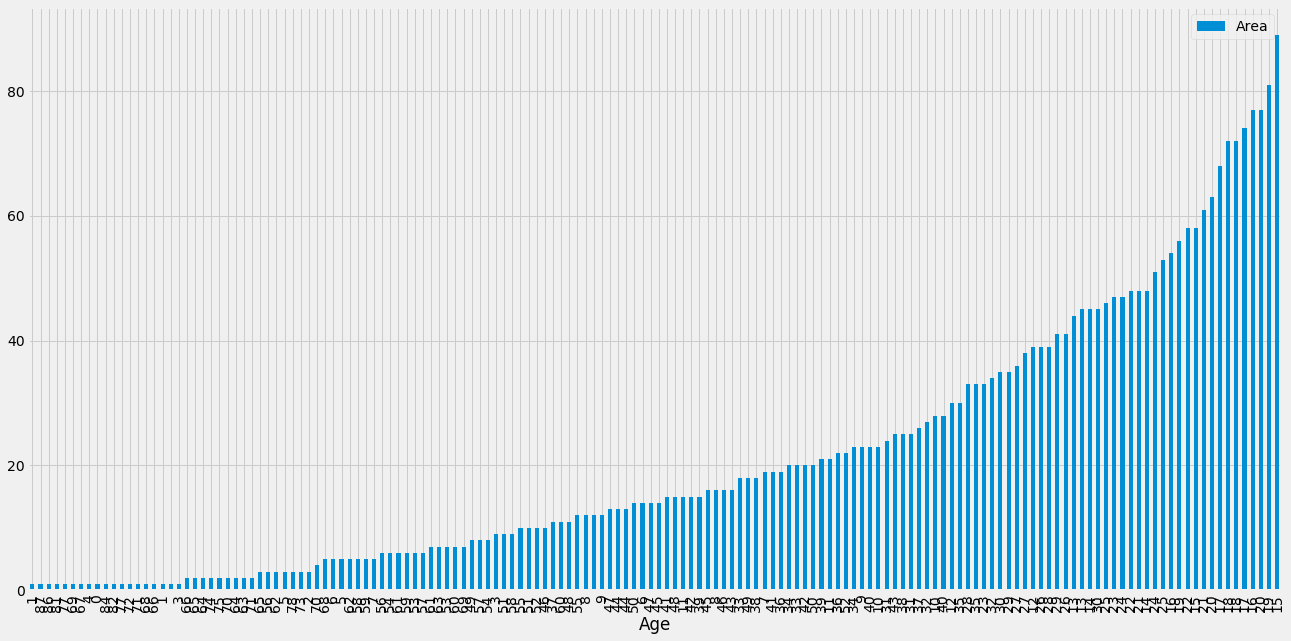

In [465]:
age_injuries.plot(kind='bar', x='Age', figsize=(20,10), xlim=(0-100))

In [467]:
sharks['Age']

0       46
1       15
4       15
6       14
7       34
8       82
10      48
12      19
13      30
15      32
16      20
18      73
19      41
20      29
21      33
22      18
24      14
25      33
26      28
27      20
29      40
32      17
33      28
34      17
37      35
38      10
39      21
40      16
41      51
42      39
43      17
44      58
45      30
47      58
50      26
51      26
52      22
56      37
57      15
58      55
59      57
61      48
63      47
64      20
65      16
67      55
68      61
69      19
70      36
71      20
72      65
73      73
74      58
75      41
76      42
77      36
78      36
80      66
82      25
83      29
84      21
85      32
86      17
87      16
88      36
89      43
90      43
94      60
95      51
96      50
97      12
99       9
100     22
102     25
103     37
104     20
105     49
106     15
107     21
108     22
109     40
110     72
112     43
113     18
114     29
115     36
117     31
119      9
120     11
121     61
124     10

In [407]:
pd.set_option('display.max_rows', 3300)

In [468]:
sharks['Age']

0       46
1       15
4       15
6       14
7       34
8       82
10      48
12      19
13      30
15      32
16      20
18      73
19      41
20      29
21      33
22      18
24      14
25      33
26      28
27      20
29      40
32      17
33      28
34      17
37      35
38      10
39      21
40      16
41      51
42      39
43      17
44      58
45      30
47      58
50      26
51      26
52      22
56      37
57      15
58      55
59      57
61      48
63      47
64      20
65      16
67      55
68      61
69      19
70      36
71      20
72      65
73      73
74      58
75      41
76      42
77      36
78      36
80      66
82      25
83      29
84      21
85      32
86      17
87      16
88      36
89      43
90      43
94      60
95      51
96      50
97      12
99       9
100     22
102     25
103     37
104     20
105     49
106     15
107     21
108     22
109     40
110     72
112     43
113     18
114     29
115     36
117     31
119      9
120     11
121     61
124     10

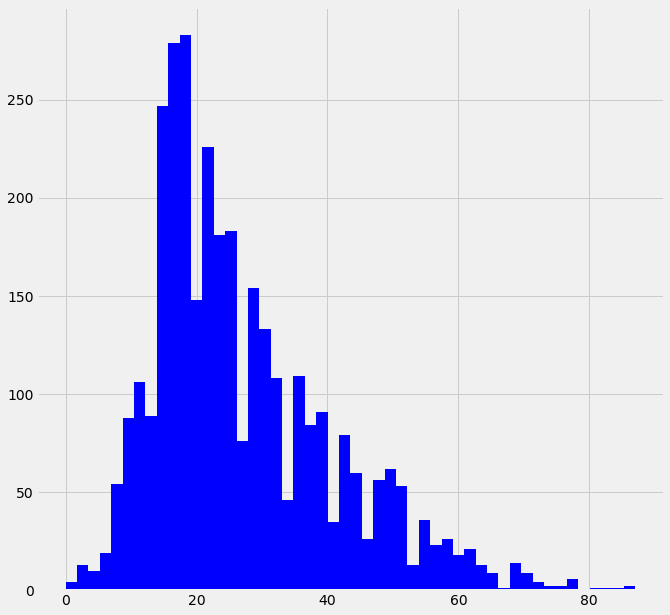

In [493]:
sharks['number_age'].hist(color='blue', figsize=(10,10), bins=50, label='Age of the victims')
plt.savefig("age.pdf")

In [496]:
sharks_surfing = sharks[sharks["Activity"] == 'Surfing']

In [509]:
sharks_surfing.plot(kind='barh', ax=ax) #df.plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', ax=ax)

In [516]:
surf = sharks[(sharks["Activity"] == "Surfing")]

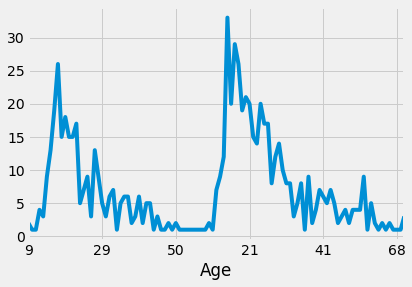

In [525]:
surf.groupby('Age')['Activity'].count().plot()

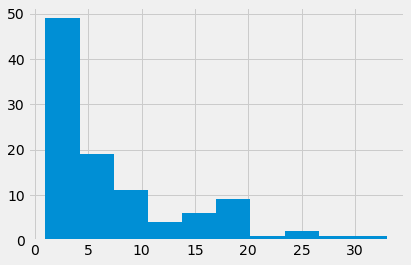

In [534]:
surf['Age'].value_counts().hist()

In [561]:
surf['number_age'].value_counts().mean()

12.982456140350877

In [555]:
df_surf = sharks[sharks["Activity"] == "Surfing"]

In [566]:
df_surf['number_age'].mean()

25.783783783783782